In [16]:
from financials_loader import FinancialsLoader as fl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

tickers = ['AMZN', 'MSFT', 'AAPL']
flist = fl(tickers)
balance_sheets = flist.load_balance_sheet()
cols_of_interest = [3,5,9,13,20,27,29,34,38,42]

AMZN
/home/michael/Share/project/Finance-App/data/AMZN Balance Sheet.csv
MSFT
/home/michael/Share/project/Finance-App/data/MSFT Balance Sheet.csv
AAPL
/home/michael/Share/project/Finance-App/data/AAPL Balance Sheet.csv


In [18]:
clean_sheets = []
for balance_sheet in balance_sheets:
    balance_sheet = balance_sheet.rename(columns={balance_sheet.columns[0]:'Timestamp'})
    balance_sheet = balance_sheet.set_index('Timestamp').T
    balance_sheet.index = pd.to_datetime(balance_sheet.index, format='%Y-%m')
    clean_sheets.append(balance_sheet)
    
columns = clean_sheets[0].columns
print(columns)

Index(['Assets', 'Current assets', 'Cash', 'Cash and cash equivalents',
       'Short-term investments', 'Total cash', 'Receivables', 'Inventories',
       'Deferred income taxes', 'Total current assets', 'Non-current assets',
       'Property, plant and equipment', 'Gross property, plant and equipment',
       'Accumulated Depreciation', 'Net property, plant and equipment',
       'Goodwill', 'Intangible assets', 'Deferred income taxes',
       'Other long-term assets', 'Total non-current assets', 'Total assets',
       'Liabilities and stockholders' equity', 'Liabilities',
       'Current liabilities', 'Accounts payable', 'Accrued liabilities',
       'Deferred revenues', 'Total current liabilities',
       'Non-current liabilities', 'Long-term debt', 'Capital leases',
       'Deferred taxes liabilities', 'Other long-term liabilities',
       'Total non-current liabilities', 'Total liabilities',
       'Stockholders' equity', 'Common stock', 'Additional paid-in capital',
       'Reta

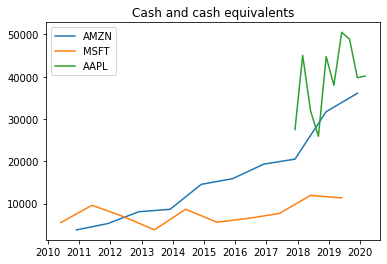

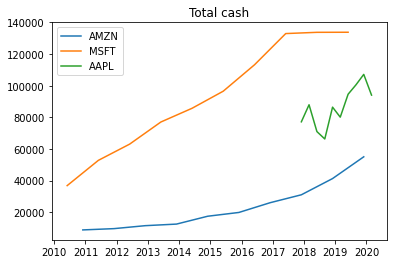

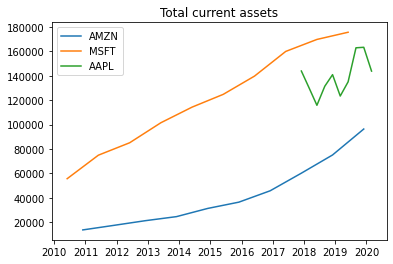

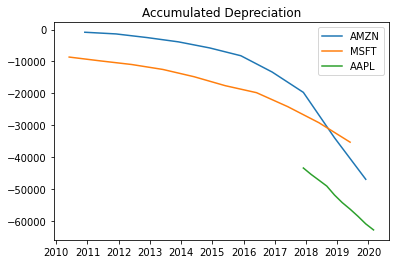

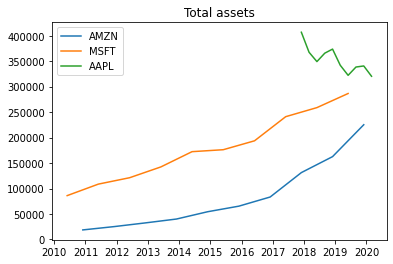

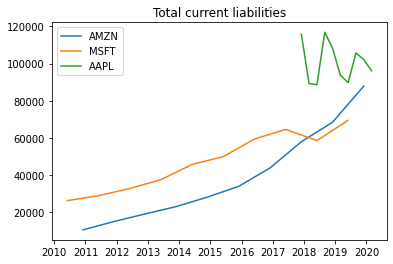

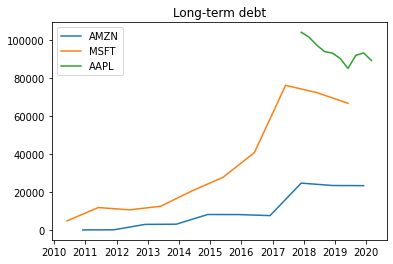

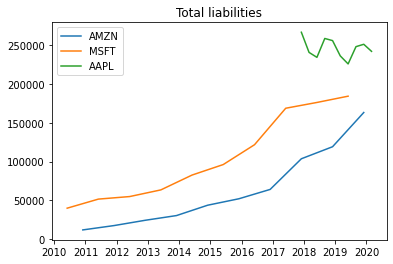

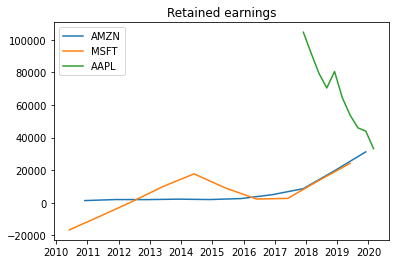

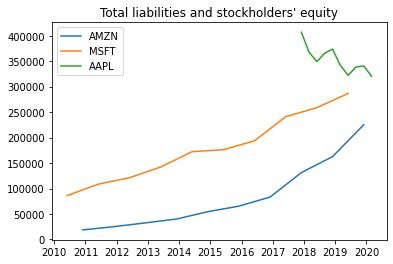

In [7]:
for col in cols_of_interest:
    plt.figure()
    for i in range(len(tickers)):
        plt.plot(clean_sheets[i].index, clean_sheets[i][columns[col]])

    plt.legend(tickers)
    plt.title(columns[col])
    plt.show()